In [18]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.signal import butter, cheby1, lfilter, freqz

from Functions.daub_5_3_lift import daub_5_3_lift
from Functions.idaub_5_3_lift import idaub_5_3_lift

In [19]:
def IIR_filter(x, b_coeff, a_coeff):
    # Создаем список из нулей.
    y = [0] * len(x)
    for k in range(len(x)):
        for m, b in enumerate(b_coeff):
            if (k-m) >= 0:
                y[k] += b * x[k-m]
        for n, a in enumerate(a_coeff[1:], start=1):
            if (k-n) >= 0:
                y[k] -= a * y[k-n]
    return y

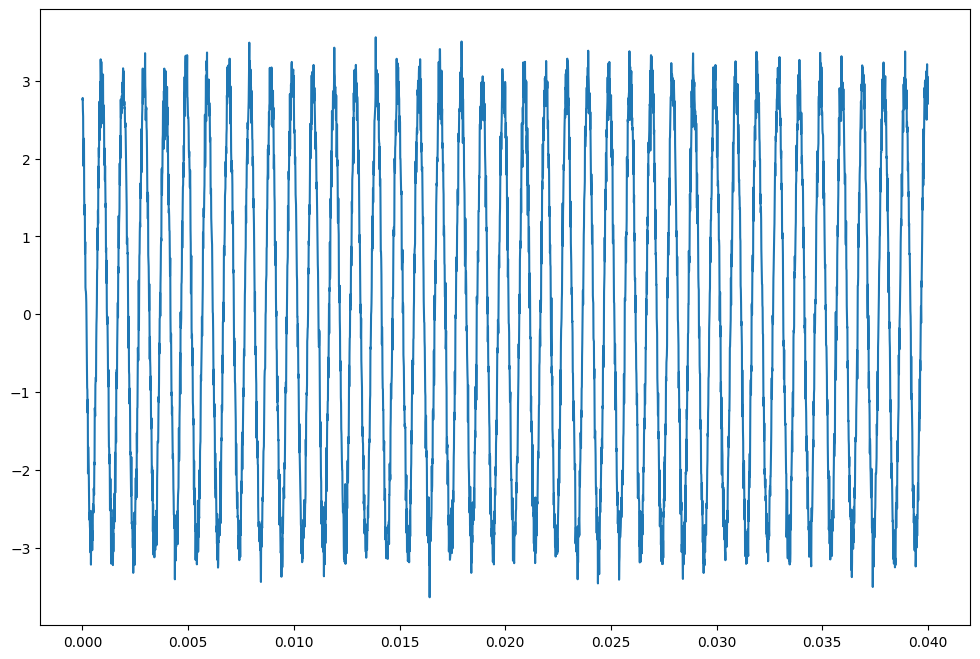

In [20]:
Xm = 3
phi_x = np.pi/6

freq_inj = 1e3
F_SAMPLE = 100e3
T_SAMPLE = 1/F_SAMPLE

F_LOW = 100
H_WINDOW = 1 / F_LOW

T_FULL = 4*H_WINDOW

N_POINT = int(T_FULL/T_SAMPLE+0.5)
N_FFT = int(H_WINDOW/T_SAMPLE+0.5)


t = np.linspace(0, T_FULL, N_POINT)
x = Xm * np.cos(2*np.pi*freq_inj*t + phi_x) + np.random.normal(0, 0.2, N_POINT)

user_figsize=(12, 8)

plt.figure(figsize=user_figsize)
plt.plot(t,x)
plt.show()

[-60, 5]
[-180, 0]


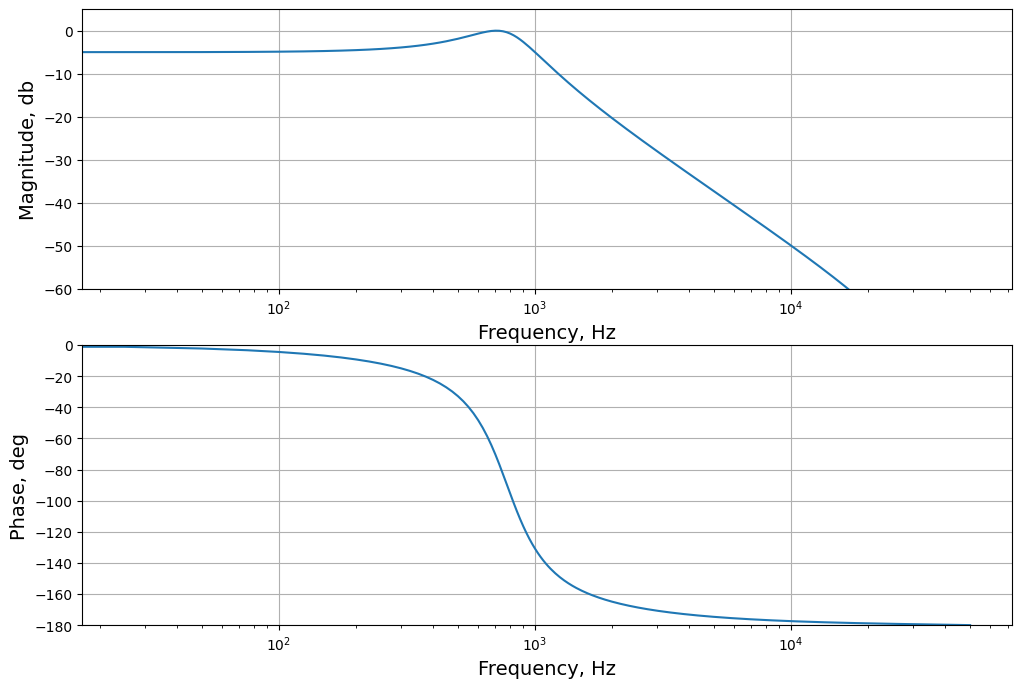

In [21]:
fc = 1e3
b, a = cheby1(2, 5, fc/(F_SAMPLE/2), btype='low')

_, h = signal.freqz(b, a, worN=N_POINT//2)
freq = np.linspace(0, F_SAMPLE/2, N_POINT//2)

abs_phase_dataset = [20*np.log10(np.abs(h)), np.unwrap(np.angle(h))*180/np.pi]

user_fontsize = 14
user_ylabel = ['Magnitude, db', 'Phase, deg']
user_ylim = [[-60, 5], [-180, 0]]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=user_figsize)
for idx in range(2):
    print(user_ylim[idx])
    ax = axes[idx]
    ax.plot(freq, abs_phase_dataset[idx])
    ax.set_xscale('log')
    #ax.legend()
    ax.set_xlabel('Frequency, Hz', fontsize=user_fontsize)
    ax.set_ylim(user_ylim[idx])
    ax.set_ylabel(user_ylabel[idx], fontsize=user_fontsize)
    ax.grid(True)

#plt.savefig('readme_img/measured_freq_resp.png', bbox_inches='tight')
plt.show()

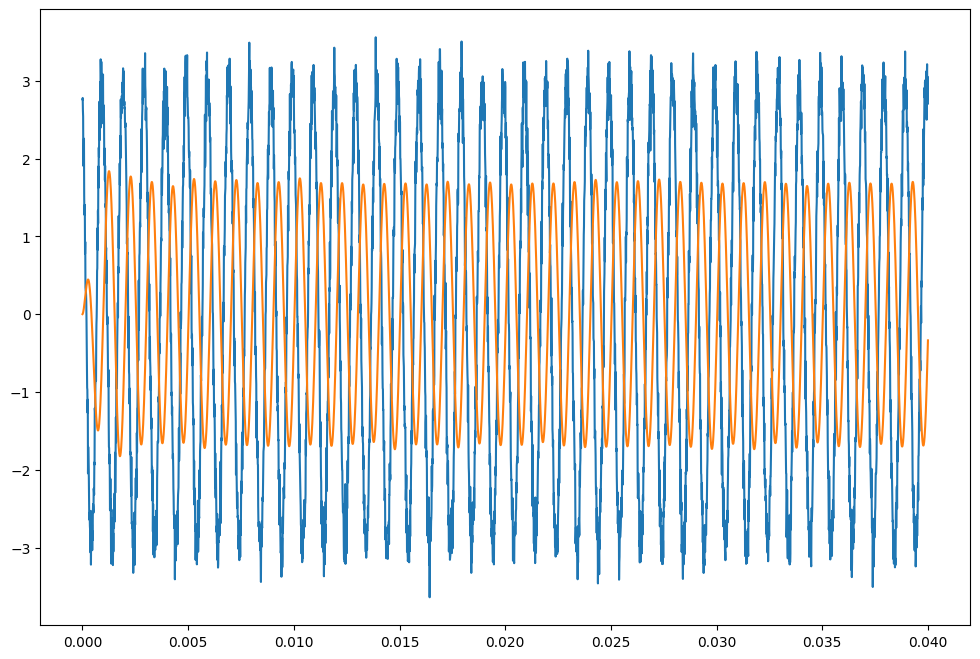

In [22]:
y = IIR_filter(x, b, a)

plt.figure(figsize=user_figsize)
plt.plot(t,x)
plt.plot(t,y)
plt.show()

In [23]:
Xfft = np.fft.fft(x[-N_FFT:])[:N_FFT//2] / (N_FFT/2)
Yfft = np.fft.fft(y[-N_FFT:])[:N_FFT//2] / (N_FFT/2)

print(np.abs(Xfft[int(freq_inj/F_LOW)]), np.angle(Xfft[int(freq_inj/F_LOW)]), phi_x)
print(np.abs(Yfft[int(freq_inj/F_LOW)]), np.angle(Yfft[int(freq_inj/F_LOW)]))
print(np.abs(Yfft[int(freq_inj/F_LOW)])/np.abs(Xfft[int(freq_inj/F_LOW)]), np.angle(Yfft[int(freq_inj/F_LOW)])-np.angle(Xfft[int(freq_inj/F_LOW)]))

2.9954724902531296 0.5737476044237874 0.5235987755982988
1.683895026719479 -1.71013097064849
0.5621467171535209 -2.2838785750722774


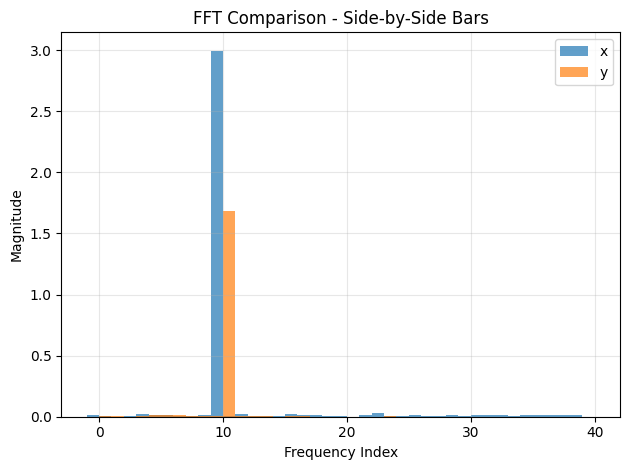

In [24]:
N_FREQ = 40
# Bar width and positions
width = 1.0
x_pos = np.arange(len(freq[:N_FREQ]))

plt.bar(x_pos - width/2, np.abs(Xfft[:N_FREQ]), width, label='x', alpha=0.7)
plt.bar(x_pos + width/2, np.abs(Yfft[:N_FREQ]), width, label='y', alpha=0.7)

plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
plt.title('FFT Comparison - Side-by-Side Bars')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()